# Introduction {-}

## Imports {-}

Several Python packages will be used throughout the assignment, and are imported below:

In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mplib
import numpy as np
import math

## Utility Functions {-}

$\qquad$Several generalized utility functions are used throughout the assigment to create plots, format values, etc.. These will be presented in the [appendix](#appendix:-utility-functions) at the end of the assignment as they are rather long. 

## ODE Solving Algorithms {-}

Three algorithms are defined and applied throughout the assignment, namely the Lagrange, Neville's, and Newton's algorithms.

### Euler's Method {-}

$\qquad$The first algorithm defined applies the (forward) Euler's method to solve a first-order ODE of the form

\begin{align}
    y\,' &=\ f \big( t,y \big) \qquad\qquad \\
    \quad
\end{align}
or a system of n first-order ODE's of the form
\begin{align}
    y_1\,' &=\ f_1 \big( t,y_1,y_2,\dots,y_n\! \big) \\
    y_2\,' &=\ f_2 \big( t,y_1,y_2,\dots,y_n\! \big) \\
           &\ \, \vdots \\
    y_n\,' &=\ f_n \big( t,y_1,y_2,\dots,y_n\! \big)
\end{align}

$\quad$

$\qquad$The function ("EulersMethod") takes in as arguments: 
$\ 1.)\,$ a pointer to the function $f(t,y)$, or a list of pointers to the functions $\ f_1(t,y_1,y_2,\dots,y_n),\ $ $\  f_2(t,y_1,y_2,\dots,y_n),$ $\, \dots \ ,\ \, f_n(t,y_1,y_2,\dots,y_n)\,; \ $ $\ 2.)\,$ the corresponding intial value or list of intial values values$; \ $ $\ 3.)\,$ the interval on which the solution is to be approximated$; \ $  and $\, 4.)\,$ the desired step size. It then ensures that the interval length is an integer multiple of the step size and adjusts the interval if necessary before applying the Euler's method algorithm as presented in Section 7.2 of the text. The function then returns an array containing the time values, as well as an array (or list of arrays if solving multiple equations) containing the approximated values at each time step for the solution (or solutions).

Note that the algorithm can be used to solve an ODE of order greater than one by first rewriting the higher-order ODE as a system of first-order ODE's (as in Problem 2).

In [1175]:
def EulersMethod(f,y_a,interval,h):  
    
    # Assign left and right bounds of the interval, then calculate the 
    # interval length L and number of time steps nh. 
    a,b = interval
    L = b-a
    nh = math.ceil(L/h)
    
    # Make sure the interval length is an integer multiple h.
    if b != nh*h:
        print("*** right bound adjusted from",b,"to",nh*h,"***")
        b = nh*h  
    
    # Call utility method "putInLists" to make sure the function(s) and
    # initial condition(s) are in list form and of equal length (exacty 
    # one I.C. per ODE), and get the number of ODE's.
    f,y_a = putInLists(f,y_a) 
    nf = len(f)

    # Create array of time values.
    t = np.linspace(a,b,nh+1)
    
    # Initialize a list of empty arrays for the approximated values of
    # the solution to each ODE, and set the first value of each array.
    w = [np.empty(nh+1) for f_i in f]   
    for j in range(0,nf):
        w[j][a] = y_a[j]  

    # Apply the Euler's method to the ODE's. The outer for loop iterates
    # through the time steps; the inner loop iterates through the ODE's.
    for i in range(0,nh):
        w_i = [ w[j][i] for j in range(0,nf) ]
        for j in range(0,nf):           
            w[j][i+1] = w[j][i] + h*f[j](t[i],*w_i)

    # Return array of time values and array (or list of arrays) of 
    # approximated solution values. 
    if nf == 1: w = w[0]
    return t,w

In [1176]:
def NewtonsMethod_rootFinder(function,derivative,initialGuess,iterations):

    f = function
    df = derivative
    p0 = initialGuess
    N = iterations
    pArray = np.empty(N+1)
    pArray[0] = p0

    for i in range(0,N):
        p_i = pArray[i]
        dx = -f(p_i)/df(p_i)
        p_next = p_i + dx
        pArray[i+1] = p_next
    return pArray[-1] 

def backwardEulersMethod(f,df,y_a,interval,h,rootfindIterations=10):  
    
    # Assign left and right bounds of the interval, then calculate the 
    # interval length L and number of time steps nh. 
    a,b = interval
    L = b-a
    nh = math.ceil(L/h)
    
    # Make sure the interval length is an integer multiple h.
    if b != nh*h:
        print("*** right bound adjusted from",b,"to",nh*h,"***")
        b = nh*h  

    # Create array of time values.
    t = np.linspace(a,b,nh+1)
    
    # Initialize an empty array for the approximated values of the
    # solution and set the first value to the initial condition.
    w[a] = y_a

    # Apply the Euler's method to the ODE's.
    for i in range(0,nh):
        # Define the function for which the root is needed, where x is
        # the desired w[i+1] value. The derivative is also defined for
        # use in the Newton's method rootfinder.
        def g(x):
            return ( x - h*f(t[i+1],x) - w[i] )
        def dgdx(x):
            return ( 1 - h*df(t[i+1],x) )
        # Use the forward Euler method to generate a guess for use in
        # the root finder
        guess = w[i] + h * f(t[i],w[i])
        # Use the Newton's method rootfinder to obtain w[i+1] = x
        w[i+1] = NewtonsMethod_rootFinder(g,dgdx,guess,rootfindIterations)

    return t,w

### Taylor series method (2nd order) {-}

In [767]:
def TaylorSeriesMethod(f,dfdt,dfdy2,y1_a,y2_a,interval,h):  
    
    # Assign left and right bounds of the interval, then calculate the interval length and number 
    #   of time steps. 
    a,b = interval
    L = b-a
    nh = math.ceil(L/h)
    
    # Check that the interval length is an integer multiple of the step size, and adjust the 
    #   right bound if necessary.
    if b != nh*h:
        print("*** right bound adjusted from",b,"to",nh*h,"***")
        b = nh*h  

    # Create array of time values.
    t = np.linspace(a,b,nh+1)
    
    # Initialize a list of empty arrays for the approximated values of the solution to each ODE, 
    #   and set the first value of each array to the corresponding initial condition. Note that
    #   the first index of w specifies the ODE, while the second index specifies the time step.
    w1 = np.empty(nh+1)  
    w2 = np.empty(nh+1)
    w1[0],w2[0] = y1_a,y2_a

    # Apply the method
    for i in range(0,nh):
        t_i,w1_i,w2_i   =  t[i],w1[i],w2[i]
        f_i,dfdt_i      =     f(t[i],w1[i],w2[i]), dfdt(t[i],w1[i],w2[i])
        dfdy1_i,dfdy2_i = dfdy1(t[i],w1[i],w2[i]), dfdy2(t[i],w1[i],w2[i]),
        
        w1[i+1] = w1_i + h*w2_i + (h**2/2.)*f_i        
        w2[i+1] = w2_i + h*f_i + (h**2/2.)*( dfdt_i + w2_i*dfdt_i + f_i*dfdt_i )

    # Return array of time values, and array (or list of arrays) of approximated solution values. 
    return t,w1,w2



### Runge-Kutta method {-}
    

In [942]:
def RungeKuttaMethod(f,y_a,interval,h,order):  
    
    if not (order==2 or order==4):
        print('invalid order')
        return None
    
    # Assign left and right bounds of the interval, then calculate the interval length and number 
    #   of time steps. 
    a,b = interval
    L = b-a
    nh = math.ceil(L/h)
    
    # Check that the interval length is an integer multiple of the step size, and adjust the 
    #   right bound if necessary.
    if b != nh*h:
        print("*** right bound adjusted from",b,"to",nh*h,"***")
        b = nh*h  
    
    # Call utility method "putInLists" to make sure the function(s) and initial condition(s)
    #   are in list form and of equal length (exacty one I.C. per ODE), and get the number 
    #   of functions (i.e. the number of ODE's).
    f,y_a = putInLists(f,y_a) 
    nf = len(f)
    
    # Create array of time values.
    t = np.linspace(a,b,nh+1)
    
    # Initialize a list of empty arrays for the approximated values of the solution to each ODE, 
    #   and set the first value of each array to the corresponding initial condition. Note that
    #   the first index of w specifies the ODE, while the second index specifies the time step.
    w = np.array([np.empty(nh+1) for f_i in f])   
    for j in range(0,nf):
        w[j,0] = y_a[j]  

    # Apply the Euler's method to the ODE's. The outer for loop iterates through the time steps,
    #   while the inner loop iterates through the ODE's.
    for i in range(0,nh):
        t_i = t[i]
        w_i = [ w[j,i] for j in range(0,nf) ]
        
        k1 = [ f[j](t_i,*w_i) for j in range(0,nf) ]
        v1 = [ w_i[j] + k1[j]*(h/2) for j in range(0,nf) ]        
        k2 = [ f[j](t_i+h/2,*v1) for j in range(0,nf) ]
        
        if order == 2:
            w2 = [ w_i[j] + k2[j]*h for j in range(0,nf) ]
            w[:,i+1] = w2
            
        elif order == 4:            
            v2 = [ w_i[j] + k2[j]*(h/2) for j in range(0,nf) ]        
            k3 = [ f[j](t_i+h/2,*v2) for j in range(0,nf) ]
        
            w3 = [ w_i[j] + k3[j]*h for j in range(0,nf) ]
            k4 = [ f[j](t_i+h,*w3) for j in range(0,nf) ]
            
            kf = [ (k1[j] + 2*k2[j] + 2*k3[j] + k4[j])/6 for j in range(0,nf) ]
            w4 = [ w_i[j] + kf[j]*h for j in range(0,nf) ]
            
            w[:,i+1] = w4
            
    # If only one ODE was solved, pull the solution array out of the ODE list
    if nf == 1: w = w[0]
        
    # Return array of time values and array (or list of arrays) of approximated solution values. 
    return t,w

# Problems {-}

## Problem 1 {-}

### Problem Statement {-}

1. Consider the ODE $y^{\,\prime}=−5y$ , with initial condition $y^{\,\prime}(0)=1$.

    a. Is this ODE stable?
    
    b. Is Euler’s method stable for this ODE using a step size $h=0.5$?
    
    c. Calculate the numerical approximate solution for $t=0$ to $t=5$ given by Euler’s method. Use time step size of $h = 0.5$ and $h = 0.1$. Plot the analytical solution and numerical solution for each time step size.
    
    d. Is the backward Euler method stable for this ODE using a step size $h=0.5$?
    
    e. Calculate the numerical approximate solution for $t=0$ to $t=5$ given by the backward Euler method. Use a time step size, $h = 0$.


### 1a.) ODE stability {-}

The ODE is not only stable, but asymptotically stable. This is because the ODE is of the form $y^{\,\prime}=\lambda\!\cdot\! y$ with $\lambda<0$, and the solution is the decaying exponential $y(t) = e^{-5t}$


subsection*{Analytical solution}

The solution for the IVP is given by

\begin{equation}
    y^{\,\prime} =\ f(t,y)\ =\ e^{\, {-5}\,t }
\end{equation}

This solution is defined as a python function below for plotting:

In [1162]:
def y(t):
    return np.e**(-5*t)

### Numerical Solutions {-}

The function $\ f$ is defined as a python function below for input to the solution algorithms:

In [1172]:
def f(t,y):
    return -5*y

The function, intial condition, and solution parameters will be passed to the solution algorithms, which return arrays for $t$ and $w$ (where $w$ is the approximated $y$).

### 1b.) Euler’s method stability for h=0.5 {-}

$\big|\, 1+h \cdot \lambda \,\big| \ =\ \big|\, 1 + (-5)\cdot(0.5) \,\big| \ =\ \big| -\!1.5 \,\big| \ =\ 1.5 \ >\, 1$, so Euler's method is unstable for $h=0.5$.

### 1c.) Euler’s method solution for h=0.5 and h=0.1 {-}

In [1168]:
t_h05,w_h05 = EulersMethod(f=[f],y_a=[1],interval=[0,5],h=0.5)
t_h01,w_h01 = EulersMethod(f=[f],y_a=[1],interval=[0,5],h=0.1)

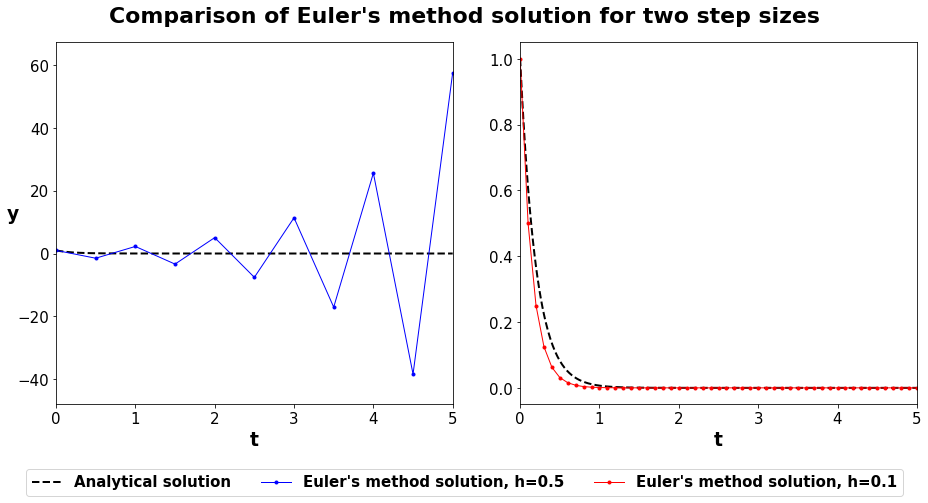

In [1166]:
print()
multiPlot(fns=[y],fnLabels=['Analytical solution'],fnStyles=['k--'],resolution=500,\
          xArrays=[t_h05,t_h01],yArrays=[w_h05,w_h01],arrayStyles=['b.-','r.-'],\
              arrayLabels=["Euler's method solution, h=0.5","Euler's method solution, h=0.1"],\
          \
          lineWidths=[2,1,1],subplotCodes=[2,0,1],spSeparation=0.17,\
          xlims=[0,5], x2lims=[0,5],y2lims=[-0.05,1.05],showGrid=0,xaxis=0,\
          \
          title="Comparison of Euler's method solution for two step sizes",xaxislabel='t',yaxislabel=['y',None],\
          title_y=1.05,title_fontsize=22, legend_y=-0.10,legend_fontsize=15,figureSize=[13,6])

As expected, it is observed that the Euler's method solution for h=0.5 is highly unstable and does not converge towards the analytical solution, while the solution for h=0.1 is stable and does converge.

### 2d.) Backward Euler’s method stability for h=0.5 {-}

Yes, because the backward Euler's method is stable for all step sizes.

### 2e.) Backward Euler’s method solution for h=0.5 and h=0.1 {-}

In [1159]:
def f(t,y):
    return -5*y

def df(t,y):
    return -5

t3,w3 = backwardEulersMethod(f,df,y_a=1,interval=[0,5],h=0.5,rootfindIterations=5)
t4,w4 = backwardEulersMethod(f,df,y_a=1,interval=[0,5],h=0.1,rootfindIterations=5)

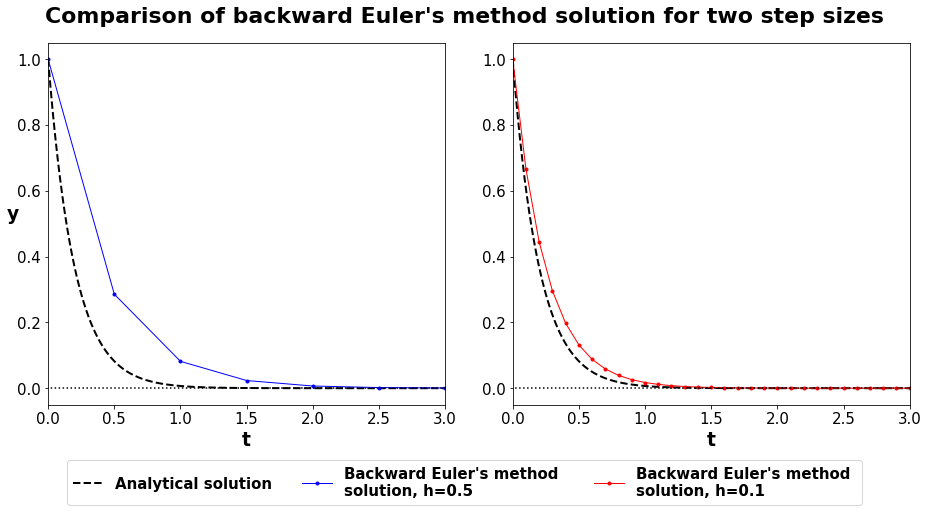

In [1160]:
print()
multiPlot(fns=[y],fnLabels=['Analytical solution'],fnStyles=['k--'],resolution=500,\
          xArrays=[t3,t4],yArrays=[w3,w4],arrayStyles=['b.-','r.-'],\
              arrayLabels=["Backward Euler's method \nsolution, h=0.5","Backward Euler's method \nsolution, h=0.1"],\
          \
          lineWidths=[2,1,1],subplotCodes=[2,0,1],spSeparation=0.17,\
          xlims=[0,3],ylims=[-0.05,1.05], x2lims=[0,3],showGrid=False,\
          \
          title="Comparison of backward Euler's method solution for two step sizes",xaxislabel='t',yaxislabel=['y',None],\
          title_y=1.05,title_fontsize=22, legend_y=-0.12,legend_fontsize=15, xaxis=1,figureSize=[13,6])
print()

## Problem 2 {-}

### Problem Statement {-}

2. Consider the initial value problem with a step size of ℎ = 0.08:

\begin{equation}
    y^{\,\prime\prime} + 6\, y^{\,\prime} + 8.96\, y = 0, \quad y\,(0)= 1, \quad y^{\,\prime}(0) = 5
\end{equation}

a. Write the analytical solution.

b. Perform numerical integration from t=0 to 8 using 4th order Runge-Kutta method.

c. Perform numerical integration from t=0 to 8 using Euler’s method.

d. Perform numerical integration from t=0 to 8 using Taylor series method of order two.

e. Plot analytical, Euler, Taylor and Runge-Kutta solutions in the same plot.

### 2a.) Analytical solution {-}

$\qquad$ The characteristic polynomial for the ODE is $r^2+6r+8.96=0$, which has roots

\begin{equation}
    r_{1,2} = \frac{1}{2} \cdot \Big[ -6 \pm \sqrt{6^2 - 4(1)(8.96)}\ =\, -2.6,-3.4
\end{equation}

This gives the general solution
\begin{equation}
    y(t) = C_1 \cdot e^{-2.6\, t} + C_2 \cdot e^{-3.4\, t}
\end{equation}

which has derivative

\begin{equation}
    y^{\,\prime}(t) = -2.6\, C_1 \cdot e^{-2.6\, t} - 3.4\,C_2 \cdot e^{-3.4\, t}
\end{equation}

$\qquad$ 

$\qquad$ Applying the initial conditions and solving the sytem for $C_1$ and $C_2$:

\begin{equation}
    y(0) \ = \ C_1 + C_2\ \equiv \ 1 \\
    y^{\,\prime}(0) \ = \ -2.6\, C_1 - 3.4\, C_2 \equiv \ 5\\
    \downarrow  \\
    C_1 = 10.5 ,\ \ C_2 = -9.5   
\end{equation}

which gives the specific solution

\begin{equation}
    y(t) = 10.5\, C_1 \cdot e^{-2.6\, t} - 9.5\, C_2 \cdot e^{-3.4\, t}
\end{equation}

This solution is defined as a python function below for plotting:

In [1264]:
def y(t):
    return 10.5*np.e**(-2.6*t) - 9.5*np.e**(-3.4*t)

### Numerical solutions {-}

The 2nd-order IVP is first reframed as a system of two 1st-order IVP's by letting $\ y_1 \equiv y$, $\ y_2 \equiv y^{\,\prime}$, which gives the system

\begin{align}
    y_1^{\,\prime} &=\ f_1(t,y_1,y_2)\, =\ \ y_2,                 &y_1 &\small(0) = 1 \\
    y_2^{\,\prime} &=\ f_2(t,y_1,y_2)\, =\ {-8.96}\,y_1 - {6}\,y_2,   &y_2 &\small(0) = 5
\end{align}

The functions $\ f_1$ and $\ f_2$ are defined as python functions below for input to the solution algorithms:

In [1278]:
def f1(t,y1,y2):
    return y2
       
def f2(t,y1,y2):
    return  -8.96*y1 - 6*y2

interval = [0,8]
stepsize = 0.08

The functions, intial conditions, and solution parameters will be passed to the solution algorithms, which return arrays for $t$, $w_1$, and $w_2$ (where $w_i$ is the approximated $y_i$). The solution to the original IVP is $y=y_1$, so the $w_1$ array is saved as the approximated solution for each method.

### 2b.) 4th order Runge-Kutta method {-}

In [1306]:
tR,(w1,w2) = RungeKuttaMethod(f=[f1,f2],y_a=[1,5],interval=interval,h=stepsize,order=4)
RungeKutta4Solution = w1[:]

### 2c.) Euler's method {-}

In [1307]:
tE,(w1,w2) = EulersMethod(f=[f1,f2],y_a=[1,5],interval=interval,h=stepsize)
EulerSolution = w1[:]

### 2d.) 2nd order Taylor series method {-}

In addition to the previously defined functions, the partial derivatives of $f_2$ are needed for the 2nd order taylor series method. These are defined below, and passed to the Taylor series method.

In [1308]:
def df2dt(t,y1,y2):
    return 0
def df2dy1(t,y1,y2):
    return -8.95    
def df2dy2(t,y1,y2):
    return -6   

tT,w1,w2 = TaylorSeriesMethod(f2,dfdt,dfdy1,dfdy2,y1_a=1,y2_a=5,interval=interval,h=stepsize)
TaylorSolution = w1[:]

### 2e.) Plot of the analytical/numerical solutions {-}

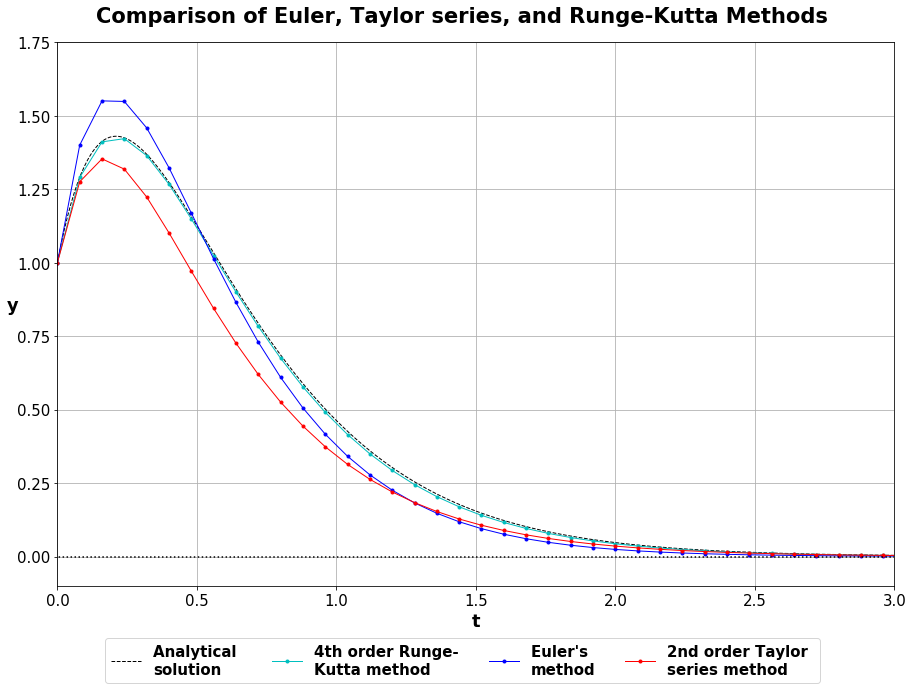

In [1309]:
print()
multiPlot(fns=[y],fnLabels=['Analytical \nsolution'],fnStyles=['k--'],resolution=500,\
          xArrays=[tR,tE,tT],yArrays=[RungeKutta4Solution,EulerSolution,TaylorSolution],arrayStyles=['c.-','b.-','r.-'],\
              arrayLabels=["4th order Runge-\nKutta method","Euler's \nmethod","2nd order Taylor \nseries method"],\
          \
          lineWidths=[1,1,1,1],subplotCodes=[0],spSeparation=0.17,\
          xlims=[0,3],ylims=[-0.1,1.75],showGrid=True,\
          \
          title="Comparison of Euler, Taylor series, and Runge-Kutta Methods",xaxislabel='t',yaxislabel=['y',None],\
          title_y=0.93,title_fontsize=21, legend_y=-0.02,legend_fontsize=15, xaxis=1,figureSize=[15,10])
print()

As shown above, all three of the numerical solutions approximate the analytical solution at least roughly, with the 4th order Runge-Kutta method providing a very close approximation.

## Problem 3 {-}

### Problem statement {-}
Consider the system of differential equations

\begin{align}
    \frac{dy_1}{dt} &=\ {-0.013} \cdot y_1 - 1000 \cdot y_1 \cdot y_3 \\
    \frac{dy_1}{dt} &=\ {-2500} \cdot y_2 \cdot y_3 \\
    \frac{dy_1}{dt} &=\ {-0.013} \cdot y_1 - 1000 \cdot y_1 \cdot y_3 - 2500 \cdot y_2 \cdot y_3
\end{align}

Initial Conditions : $\quad 𝑦_1(0)=1$, $\ \ 𝑦_2(0)=1$, $\ \ 𝑦_3(0)=0$

Approximate the solution from $t=0$ to $5$ using the Runge-Kutta 4th order and Euler method with a
step size of $h=0.0001$.

### Numerical solutions {-}

In [1219]:
def f1(t_i,y1,y2,y3):
    return -0.013*y1 - 1000*y1*y3
       
def f2(t_i,y1,y2,y3):
    return -2500*y2*y3

def f3(t_i,y1,y2,y3):
    return -0.013*y1 - 1000*y1*y3 - 2500*y2*y3

#### 4th order Runge-Kutta method  {-}

In [1249]:
t0r,(w1r,w2r,w3r) = RungeKuttaMethod(f=[f1,f2,f3],y_a=[1,1,0],interval=[0,4],h=0.0001,order=4)
RungeKutta4Solutions = [ w1r[:],w2r[:],w3r[:] ]

#### Euler's method {-}

In [1250]:
t0e,(w1e,w2e,w3e) = EulersMethod(f=[f1,f2,f3],y_a=[1,1,0],interval=[0,4],h=0.0001)
EulerSolutions = [ w1e[:],w2e[:],w3e[:] ]

### Solution plots  {-}

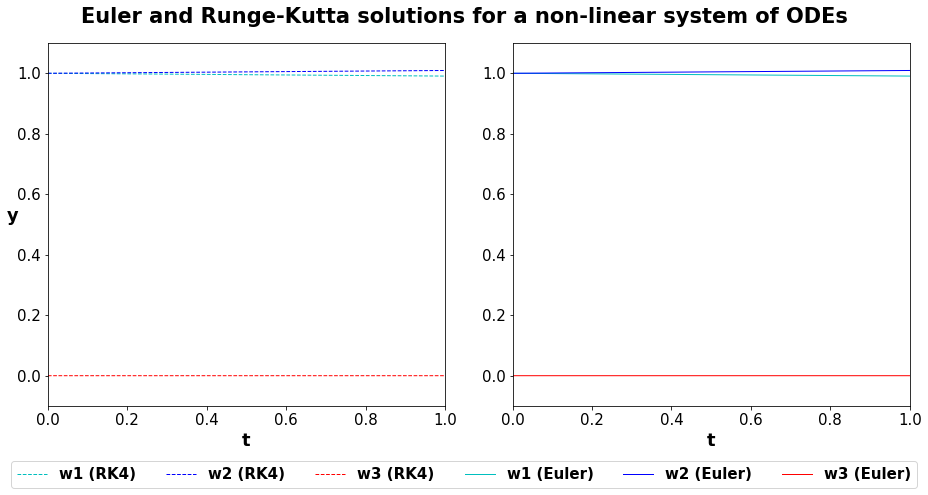

In [1263]:
print()
multiPlot(fns=[],fnLabels=['Analytic \nsolution'],fnStyles=['k-.'],resolution=500,\
          xArrays=[t0r]*3+[t0e]*3,yArrays=[*RungeKutta4Solutions,*EulerSolutions],\
              arrayStyles=['c--','b--','r--','c-','b-','r-'],\
              arrayLabels=["w1 (RK4)","w2 (RK4)","w3 (RK4)","w1 (Euler)","w2 (Euler)","w3 (Euler)",],\
          \
          lineWidths=[1]*3+[1]*3,subplotCodes=[0,0,0,1,1,1],spSeparation=0.17,\
          xlims=[0,1],ylims=[-0.1,1.1],xaxis=0,showGrid=0,\
          \
          title="Euler and Runge-Kutta solutions for a non-linear system of ODEs",\
          xaxislabel='t',yaxislabel=['y',None],\
          title_y=1.05,title_fontsize=21, legend_y=-0.08,legend_fontsize=15,figureSize=[13,6] )
print()

In [1216]:
alpha = 2/3
beta = 4/3
sigma = 1
gamma = 1

prey0,pred0 = 0.1,1
tstart,tend = 0,20

def fx(t_i,x,y):
    return alpha*x - beta*x*y
       
def fy(t_i,x,y):
    return sigma*x*y - gamma*y

t0e,(wxe,wye) = EulersMethod(f=[fx,fy],y_a=[prey0,pred0],interval=[tstart,tend],h=0.1)
we = [wxe,wye]
t0r,(wxr,wyr) = RungeKuttaMethod(f=[fx,fy],y_a=[prey0,pred0],interval=[tstart,tend],h=0.5,order=4)
wr = [wxr,wyr]
t0p,(wxp,wyp) = RungeKuttaMethod(f=[fx,fy],y_a=[prey0,pred0],interval=[tstart,tend],h=0.001,order=4)
wp = [wxp,wyp]

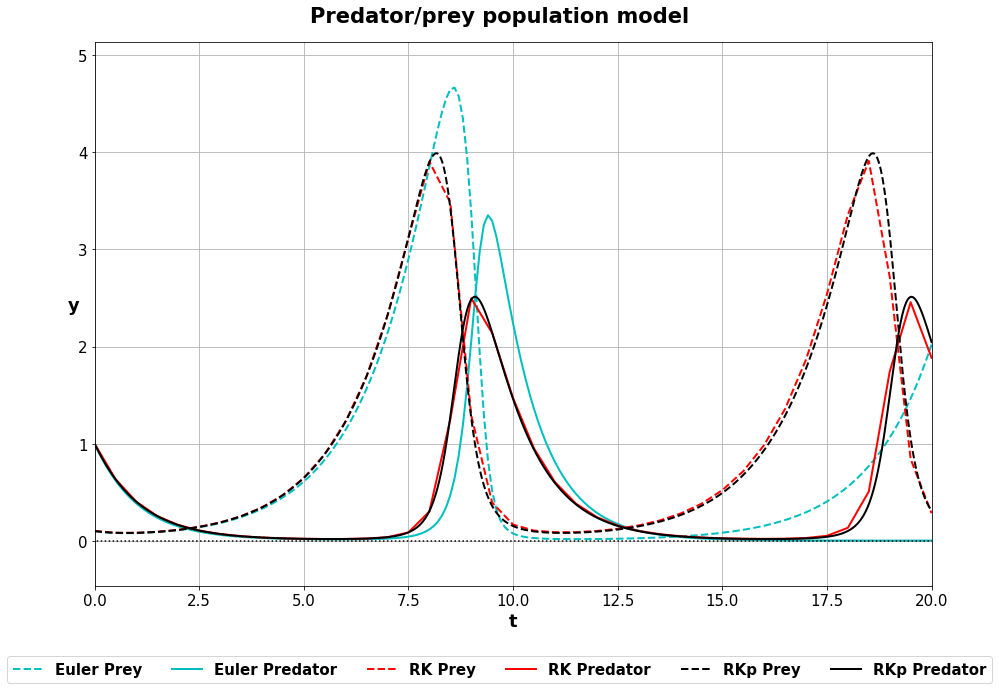

In [1217]:
print()
multiPlot(fns=[],fnLabels=[],fnStyles=[],resolution=500,\
          xArrays=[t0e]*2+[t0r]*2+[t0p]*2,yArrays=[*we,*wr,*wp],arrayStyles=['c--','c-','r--','r-','k--','k-'],\
              arrayLabels=["Euler Prey","Euler Predator","RK Prey","RK Predator","RKp Prey","RKp Predator"],\
          \
          lineWidths=[2],subplotCodes=[0],spSeparation=0.17,\
          xlims=[tstart,tend],ylims=[None,None],showGrid=True,\
          \
          title="Predator/prey population model",xaxislabel='t',yaxislabel=['y',None],\
          title_y=0.93,title_fontsize=21, legend_y=-0.02,legend_fontsize=15, xaxis=1,figureSize=[15,10])
print()

# Appendix: Utility Functions {-}

Various utility functions are defined here for use throughout the assignment. The functions include a generalized plotting function 'multiPlot' for plotting both functions and point sets, several tools for formatting values and lists of values, and a function for making neat tables from sets of data. Note that these functions need to be executed before the rest of the worksheet, but are placed at the back save space.

In [11]:
def putInLists(*args,checkNum=True):
    
    args_ = list(args[:])    
    n = len(args_)
    
    for i in range(0,n):
        if type(args_[i]) != list:
            args_[i] = [args_[i]]
    
    if checkNum and n > 1:
        for i in range(1,n):
            if len(args_[i]) != len(args_[0]):
                print("putInList error; lengths do no match")
                args_[i] = args_[0] = None              
     
    return args_            

In [722]:
def padList(target,template,pad = ''):    
    dL = len(template) - len(target)       
    if dL == 0:
        return target          
    elif dL > 0:
        
        if pad == None or pad == '':
            padList = ['']*dL
            
        if pad == 'matchLast':
            if len(target) > 0:
                padList = [target[-1]]*dL
            else: 
                padList = ['']*dL
        
        elif type(pad)==str and len(pad) > 1 and pad[-1] == 'i':
            i0 = len(target)+1
            padList = [ pad[:-2] + str(i) for i in range(i0,i0+dL)]
        
        elif type(pad)==str and len(pad) > 2 and pad[-2] == 'i' and type(eval(pad[-1])) == int:
            i0 = eval(pad[-1])
            padList = [ pad[:-2] + str(i) for i in range(i0,i0+dL)]
            
        else:  
            padList = [pad]*dL
        return [*target, *padList]        
    elif dL < 0:
        return target[0:len(template)]

In [314]:
def constant(val):
    def constant_(x):
        return np.full_like(x,val)
    return constant_

def zero():
    return constant(0)

def error(f1,f2):    
    def error_(x):
        if type(x) == np.ndarray:
            y   = np.zeros_like(x)
        else: y = 0                
        y += f1(x) - f2(x)     
        return y
    return error_

In [1041]:
def multiPlot(fns=[],fnLabels=[],fnStyles=[],resolution=100,\
              xArrays=[],yArrays=[],arrayLabels=[],arrayStyles=[],\
              vlines=[],vlineLabels=[],vlineStyles=[],lineWidths=[1],subplotCodes=[0], \
              xlims=[0,5],ylims=[None,None], xscale='linear',yscale='linear',x2lims=[None,None],y2lims=[None,None],\
              xaxis=True, xaxislabel='x',yaxislabel='f(x)',spSeparation=0.17,\
              title='',title_fontsize=24,title_y=1,legend_y=-0.1,legend_fontsize=15,\
              figureSize=[10,6],legendLoc='lower center',showGrid=True,show=True,**otherArgs):
###################################################################################
###################################################################################
    if len(fns)==0 and ( len(yArrays)==0 or len(xArrays)==0 ): return None
    plt.close()
    np.seterr(divide='ignore',invalid='ignore')    
    
    nsp = 1
    for i,subplotCode in enumerate(subplotCodes):
        if subplotCode==1 or subplotCode==2:
            nsp= 2
        else:
            subplotCodes[i] = 0              
    if nsp== 1:
        subplotCodes = padList(subplotCodes,fns+yArrays+vlines,pad=0)
    elif nsp== 2:
        subplotCodes = padList(subplotCodes,fns+yArrays+vlines,pad=2)
    
    for i in range(0,len(fns+yArrays+vlines)):
        if   subplotCodes[i] == 0: subplotCodes[i] = [0]
        elif subplotCodes[i] == 1: subplotCodes[i] = [1]
        elif subplotCodes[i] == 2: subplotCodes[i] = [0,1]

    fnSpCodes = subplotCodes[0:len(fns)]
    arraySpCodes = subplotCodes[len(fns):len(fns)+len(yArrays)]
    vlineSpCodes = subplotCodes[len(fns)+len(yArrays):]        
     
    fig,(axes) = plt.subplots(1,nsp)
    axes = np.array(axes,ndmin=1)
    
    xaxislabel,yaxislabel = putInLists(xaxislabel,yaxislabel,checkNum=False) 
    xaxislabel = padList(xaxislabel,axes,pad = 'matchLast')
    yaxislabel = padList(yaxislabel,axes,pad = 'matchLast')
        
    lineWidths = padList( lineWidths, fns+yArrays+vlines, pad = 'matchLast' )
    lwi = 0
    
    xmin,xmax = xlims
    ymin,ymax = ylims    
    ymins,ymaxs = [],[]
    
###################################### fns ########################################
    if len(fns) > 0:        
        if (xscale=='log' or xscale=='symlog'): 
            x_arr = 10**np.linspace(np.log10(xmin),np.log10(xmax),int(resolution + 1))
        else: 
            x_arr = np.linspace(xmin,xmax,int(resolution + 1)) 
            
        fnArrays = [fn(x_arr) for fn in fns]
        if (ymin==None or ymax==None):
            ymins += [min([np.min(array) for array in fnArrays])]
            ymaxs += [max([np.max(array) for array in fnArrays])]  
        
        fnLabels = padList(fnLabels,fns,pad='')
        fnStyles = padList(fnStyles,fns,pad='')
          
        N = len(fns)        
        for i in range(0,N):       
            for sp in fnSpCodes[i]:
                axes[sp].plot(x_arr, fnArrays[i], fnStyles[i], label=fnLabels[i],lineWidth=lineWidths[lwi])
            lwi += 1
################################# x and y arrays ##################################
    if len(xArrays) > 0 and len(yArrays) > 0:
        xArrays = padList(xArrays,yArrays,pad='matchLast')
        arrayLabels = padList(arrayLabels,yArrays,pad='array_i')            
        arrayStyles = padList(arrayStyles,yArrays,pad='')
                
        if (ymin==None or ymax==None):
            ymins += [min( [ np.min(yArray[np.where(np.logical_and(xArray>=xmin,xArray<=xmax))]) \
                              for xArray,yArray in zip(xArrays,yArrays) ] )]
            ymaxs += [max( [ np.max(yArray[np.where(np.logical_and(xArray>=xmin,xArray<=xmax))]) \
                              for xArray,yArray in zip(xArrays,yArrays) ] )]            
        N = len(yArrays) 
        for i in range(0,N):
            for sp in arraySpCodes[i]:
                axes[sp].plot(xArrays[i], yArrays[i], arrayStyles[i],label=arrayLabels[i],lineWidth=lineWidths[lwi])
            lwi += 1
###################################### ylims ######################################
    if ymin==None or ymax==None:
        if ymin == None:  ymin = min(ymins)
        if ymax == None:  ymax = max(ymaxs)        
        yrange = ymax - ymin
        ymin -= 0.1*yrange
        ymax += 0.1*yrange    
        
    xminList,xmaxList,yminList,ymaxList = putInLists(xmin,xmax,ymin,ymax)    
    if nsp > 1:
        x2min,x2max = x2lims
        y2min,y2max = y2lims
        if x2lims==[None,None]: x2min,x2max = xmin,xmax
        if y2lims==[None,None]: y2min,y2max = ymin,ymax 
        xminList += [x2min]
        xmaxList += [x2max]
        yminList += [y2min]
        ymaxList += [y2max]
###################################### vlines #####################################
    for vline in vlines:
        xarr = np.array([vline,vline])
        if ymin != None and ymax != None: yarr = np.array([ymin,ymax])
        np.seterr(divide='ignore',invalid='ignore') 
        for ax in axes:
            ax.plot(xarr, yarr, 'k--',lineWidth=lineWidths[lwi])
        lwi += 1        
################################### plot setup ####################################
    handles, labels = [],[]
    for i,ax in enumerate(axes):
        xmin,xmax,ymin,ymax = xminList[i],xmaxList[i],yminList[i],ymaxList[i]
        allHandles,allLabels = ax.get_legend_handles_labels()
        for j in range(0,len(allHandles)):    
            if labels.count(allLabels[j]) == 0:
                handles += [allHandles[j]]
                labels += [allLabels[j]]
            
        if not xaxislabel[i]==None: ax.set_xlabel(xaxislabel[i],size=0.85*title_fontsize,fontweight="bold")
        if not yaxislabel[i]==None: ax.set_ylabel(yaxislabel[i],size=0.85*title_fontsize,fontweight="bold",rotation=0)  

        if xaxis: ax.plot(np.array([xmin-1,xmax+1]),np.array([0,0]),'k:')
        ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax])        
        ax.tick_params(axis='both', which='major', labelsize=15) 
        
        if type(xscale) == list and len(xscale) > 1:
            ax.set_xscale(value=xscale[0],**xscale[1])
        else:  
            ax.set_xscale(value=xscale)
        if type(yscale) == list and len(yscale) > 1:
            ax.set_yscale(value=yscale[0],linthreshy=yscale[1])
        else:  
            ax.set_yscale(value=yscale) 
        ax.set(**otherArgs)
        
        ax.grid(showGrid)
        
    fig.suptitle(title, fontsize=title_fontsize,fontweight="bold",y = title_y)
    fig.set_size_inches(figureSize[0],figureSize[1]) 
    
    if len(labels) > 0: 
        props = mplib.font_manager.FontProperties(size=legend_fontsize,weight='bold')
        plt.legend( handles,labels,prop=props,loc=legendLoc,\
                   bbox_to_anchor=(0,legend_y,1,1),bbox_transform=plt.gcf().transFigure,\
                   ncol=len(handles), fancybox=True)
    if nsp > 1: 
        plt.tight_layout() 
        fig.subplots_adjust(wspace=spSeparation)     
    if show: plt.show()
###################################################################################
###################################################################################